In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import datetime as dt
%matplotlib inline

In [4]:
data=pd.read_csv('/content/drive/Shareddrives/PP NGHIÊN CỨU LIÊN NGÀNH/online_retail_II.csv',sep=',',encoding='ISO-8859-1',header=0)
df = data.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


#2. Data Preparation

In [6]:
# Check null values
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [7]:
# drop null values
df.dropna(inplace=True)
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [8]:
# check invoice that contains 'C'
df_C = df[df['Invoice'].str.contains('C')]
df_C.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [9]:
df_clone = df.groupby(["Invoice", "Customer ID"])[["Quantity", "Price"]].sum().reset_index().sort_values("Quantity", ascending=True)
df_clone["Total"] = df_clone["Quantity"].abs() * df_clone["Price"] + df_clone["Customer ID"]
df_clone["Dup"] = df_clone[["Total"]].duplicated()

key = []
for row in df_clone.itertuples():
    if row[6] == True:
        key.append(row[1])

In [10]:
df_clone

,Invoice,Customer ID,Quantity,Price,Total,Dup
40129,C524235,14277.0,-87167,6.81,607884.27,False
44871,C581484,16446.0,-80995,2.08,184915.60,False
41644,C541433,12346.0,-74215,1.04,89529.60,False
41234,C536757,15838.0,-18720,0.06,16961.20,False
42430,C550456,15749.0,-9014,15.80,158170.20,False
...,...,...,...,...,...,...
20348,541431,12346.0,74215,1.04,89529.60,True
36942,581483,16446.0,80995,2.08,184915.60,True
3064,497946,13902.0,83774,7.95,679905.30,False
13425,524174,13687.0,87167,6.81,607294.27,False


In [11]:
df = df[~df["Invoice"].isin(key)]
df.drop(df[df["Invoice"].str.contains("C")].index, inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [12]:
# check duplicates
df[df.duplicated()].shape

(25855, 8)

In [13]:
df.loc[df.duplicated()].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
390,489517,84951A,S/4 PISTACHIO LOVEBIRD COASTERS,1,2009-12-01 11:34:00,2.55,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
657,489529,22028,PENNY FARTHING BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom
658,489529,22036,DINOSAUR BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom


In [14]:
# checking the price column which has a value of 0
df[df['Price']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
...,...,...,...,...,...,...,...,...
979925,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,2011-11-10 11:49:00,0.0,13081.0,United Kingdom
1004540,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom
1006110,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway
1011446,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom


{'whiskers': [<matplotlib.lines.Line2D at 0x7879667de170>,
 'caps': [<matplotlib.lines.Line2D at 0x7879667de6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7879667ddb40>,
 'medians': [<matplotlib.lines.Line2D at 0x7879667debf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7879667dee90>,
 'means': []}

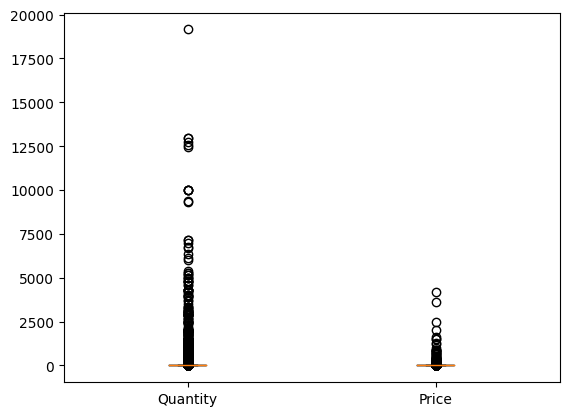

In [15]:
plt.boxplot([df['Quantity'],df['Price']],labels=['Quantity','Price'],showfliers=True)

In [16]:
# change InvoiceDate dtype to datetime
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792011 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      792011 non-null  object        
 1   StockCode    792011 non-null  object        
 2   Description  792011 non-null  object        
 3   Quantity     792011 non-null  int64         
 4   InvoiceDate  792011 non-null  datetime64[ns]
 5   Price        792011 non-null  float64       
 6   Customer ID  792011 non-null  float64       
 7   Country      792011 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.4+ MB


In [17]:
# create Revenue Column
df['Revenue'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [18]:
# Checcking the statsitic of numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,792011.0,12.709301,72.495907,1.0,2.00,5.00,12.00,19152.00
Price,792011.0,3.035649,9.903053,0.0,1.25,1.95,3.75,4161.06
Customer ID,792011.0,15339.327990,1695.917430,12346.0,13988.00,15281.00,16813.00,18287.00
Revenue,792011.0,21.016053,68.900600,0.0,4.95,11.80,19.50,15818.40


In [19]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'],format="%Y-%m-%d %H:%M:%S")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


#3. Exploratory Data Analysis (EDA)

In [20]:
# checking total order in dataset
df['Invoice'].nunique()

34553

In [21]:
# checking number of customer
df['Customer ID'].nunique()

5766

In [22]:
# Checking the number of Quantity sold
df['Quantity'].sum()

10065906

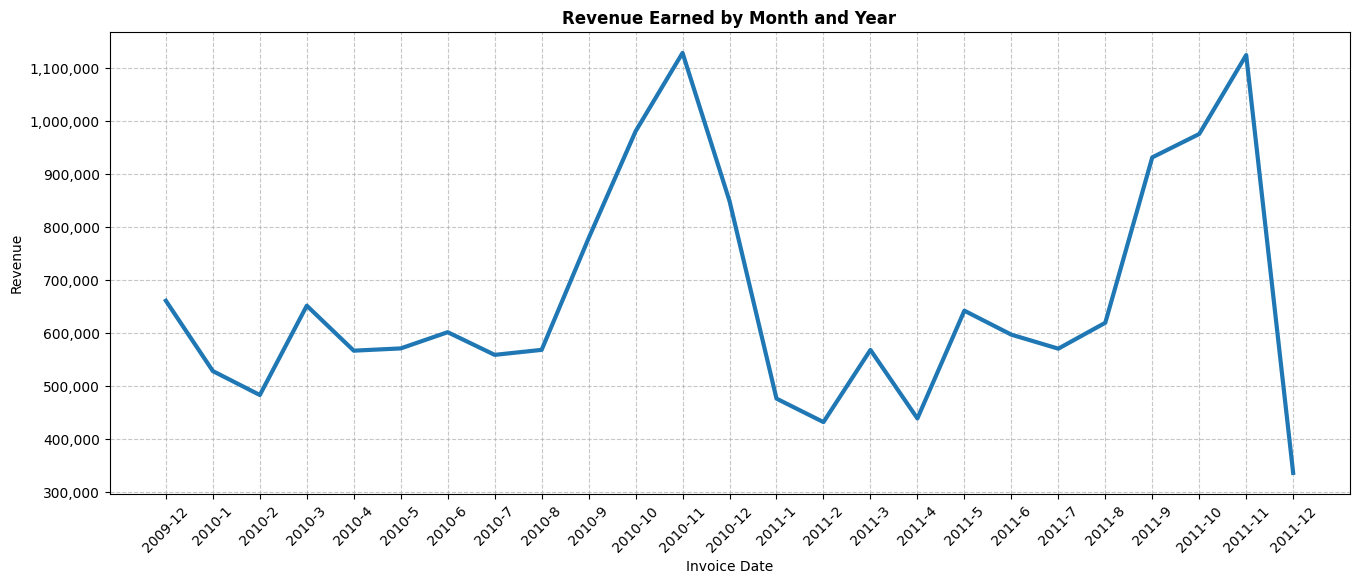

In [23]:
# Revenue per month and year
monthly_revenue = df.groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month])['Revenue'].sum()

# Create a line plot of monthly revenue
ax = monthly_revenue.plot(kind='line', figsize=(16,6), linewidth=3)

# Set xticks and xticklabels to show all values
ax.set_xticks(range(len(monthly_revenue.index)))
ax.set_xticklabels(['{}-{}'.format(year, month) for year, month in monthly_revenue.index], rotation=45)

# Set ylabel format
fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# set title and label
plt.xlabel('Invoice Date')
plt.ylabel('Revenue')
plt.title('Revenue Earned by Month and Year', fontweight='bold')
plt.grid(linestyle='--', alpha=0.7)


# Show the plot
plt.show()

In [24]:
# Top 10 products based on Description
top_10_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product


,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,5034
1,REGENCY CAKESTAND 3 TIER,3344
2,ASSORTED COLOUR BIRD ORNAMENT,2735
3,JUMBO BAG RED RETROSPOT,2621
4,REX CASH+CARRY JUMBO SHOPPER,2115
5,PARTY BUNTING,2073
6,LUNCH BAG BLACK SKULL.,2066
7,LUNCH BAG SPACEBOY DESIGN,1914
8,HOME BUILDING BLOCK WORD,1902
9,STRAWBERRY CERAMIC TRINKET BOX,1877


Text(0.5, 1.0, 'Top 10 products')

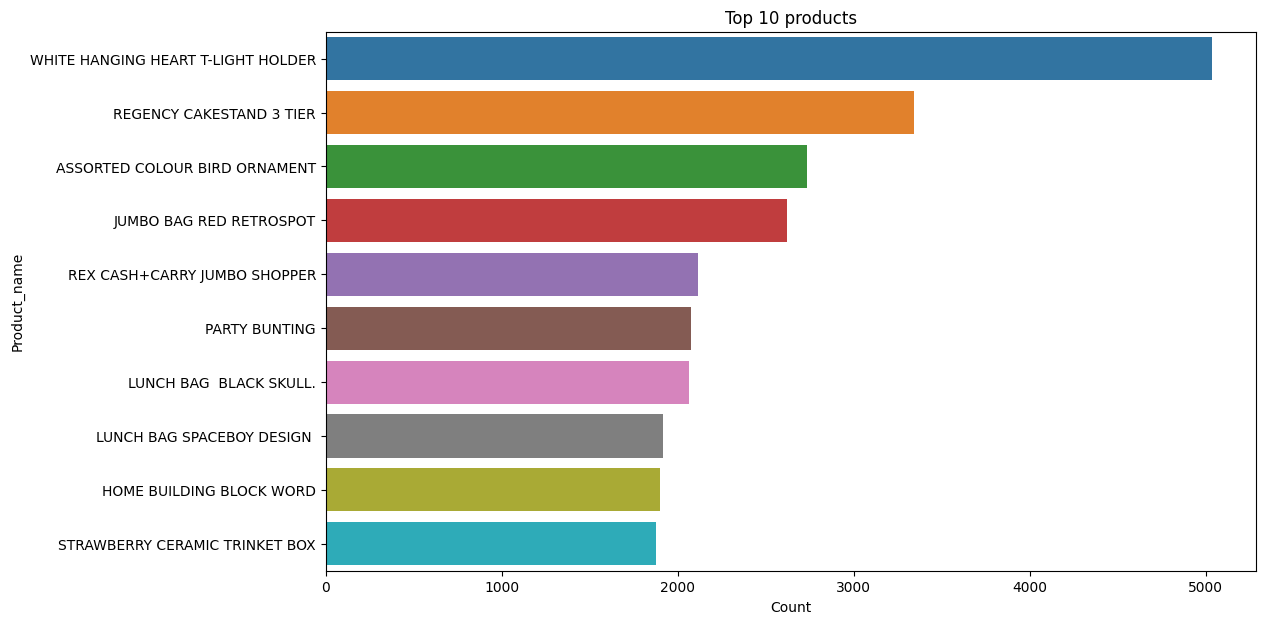

In [25]:
plt.figure(figsize=(12,7))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')

In [26]:
# top 10 based on StockCode amount
top_10_product=df['StockCode'].value_counts().reset_index().rename(columns={'index':'Product_name','StockCode':'Count'}).head(10)
top_10_product

,Product_name,Count
0,85123A,5041
1,22423,3344
2,85099B,3256
3,84879,2735
4,20725,2627
5,21212,2623
6,21034,2115
7,47566,2073
8,20727,2066
9,22383,2065


Text(0.5, 1.0, 'Top 10 products')

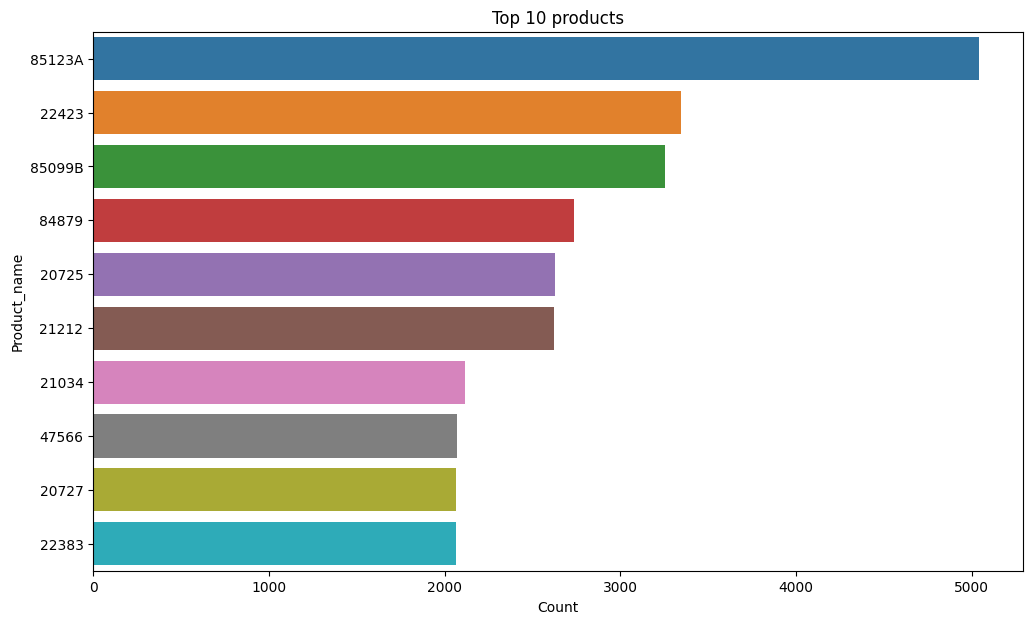

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')

In [28]:
#Bottom 10 products based on Description
bottom_10_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

,Product_name,Count
5266,ANGEL ON KNEES METAL POLE 100CM H,1
5267,"GLASS JAR, ENGLISH CONFECTIONERY",1
5268,MULTICOLOUR DOTS PLATE,1
5269,BLUE DROP EARRINGS W BEAD CLUSTER,1
5270,S/6 SCANDINAVIAN HEART T-LIGHT,1
5271,AMBER CRYSTAL DROP EARRINGS,1
5272,SET OF 6 DOTS CHOPSTICKS,1
5273,OPAL WHITE/SILVER FLOWER NECKLACE,1
5274,GREEN CHENILLE SHAGGY C/COVER,1
5275,HEXAGONAL CRYSTAL PERFUME BOTTLE,1


Text(0.5, 1.0, 'Bottom 10 products')

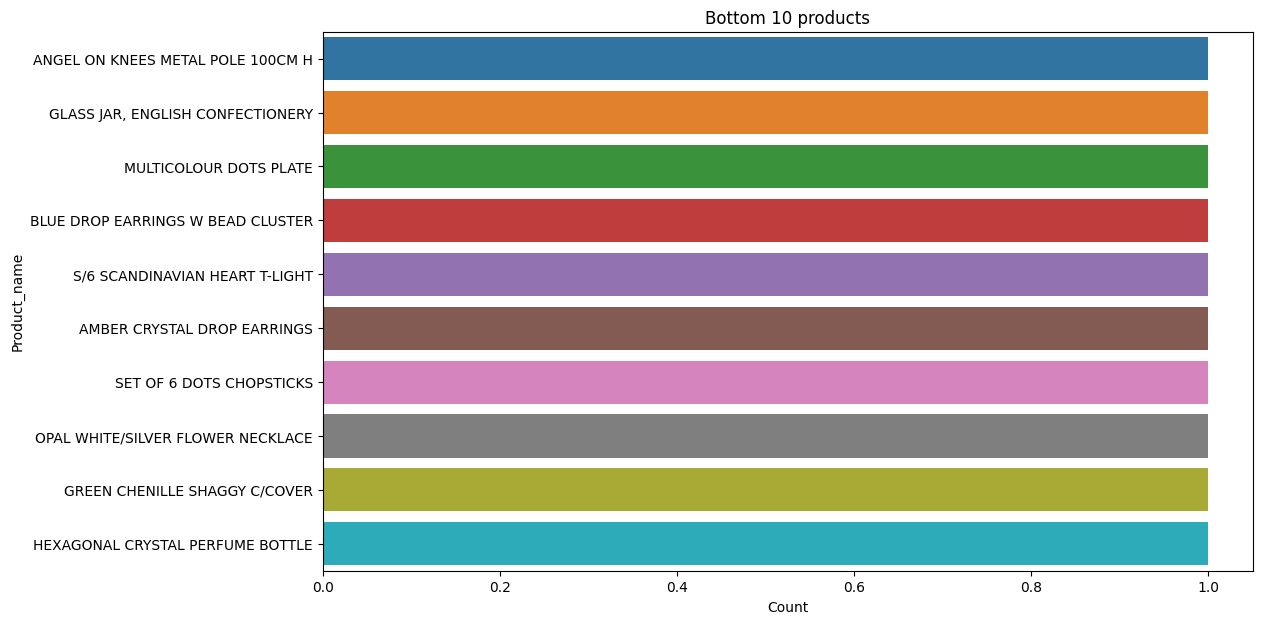

In [29]:
plt.figure(figsize=(12,7))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 products')

In [30]:
#Bottome 10 products based on StockCode
bottom_10_product=df['StockCode'].value_counts().reset_index().rename(columns={'index':'Product_name','StockCode':'Count'}).tail(10)
bottom_10_product

,Product_name,Count
4614,45014,1
4615,72796C,1
4616,37432,1
4617,21409,1
4618,90141D,1
4619,84567,1
4620,90037D,1
4621,79301,1
4622,84387A,1
4623,20939,1


Text(0.5, 1.0, 'Bottom 10 products')

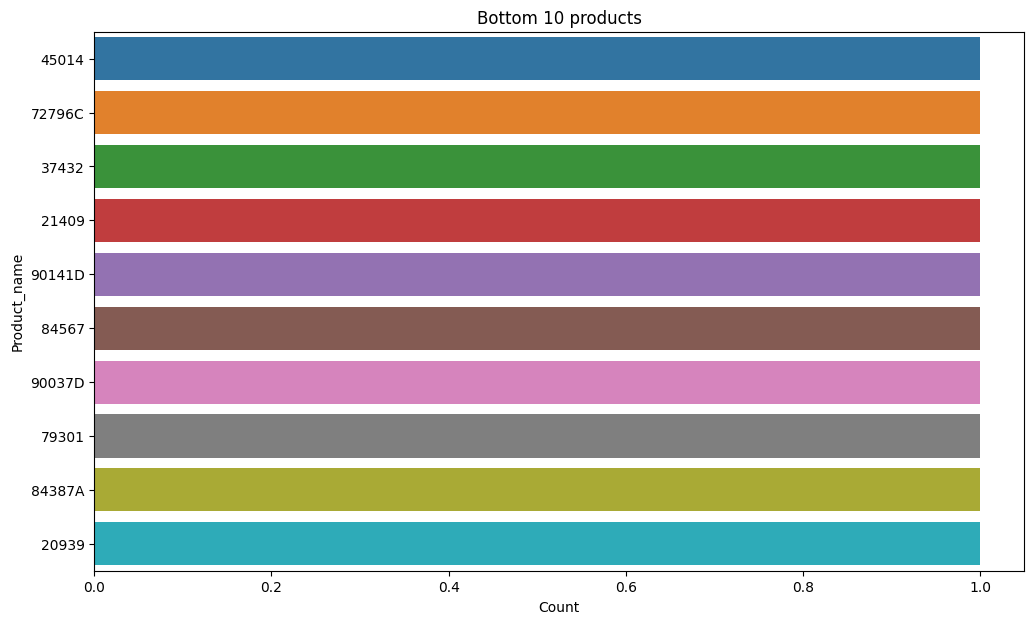

In [31]:
plt.figure(figsize=(12,7))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 products')

In [32]:
df.rename(columns={'Customer ID':'CustomerID'},inplace=True)

In [33]:
df['CustomerID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 792011 entries, 0 to 1067370
Series name: CustomerID
Non-Null Count   Dtype  
--------------   -----  
792011 non-null  float64
dtypes: float64(1)
memory usage: 12.1 MB


In [34]:
# Convert column "Customer ID" from float64 to integer
df['CustomerID'] = df['CustomerID'].astype(int)

In [35]:
df['CustomerID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 792011 entries, 0 to 1067370
Series name: CustomerID
Non-Null Count   Dtype
--------------   -----
792011 non-null  int64
dtypes: int64(1)
memory usage: 12.1 MB


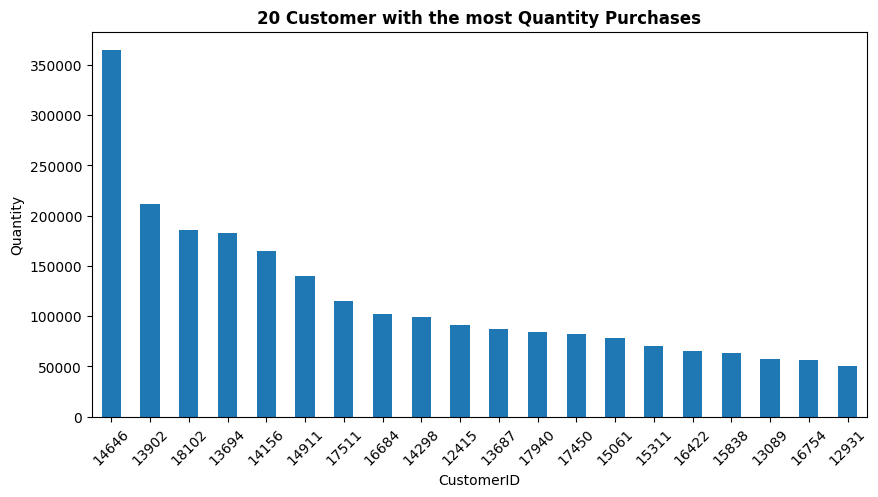

In [36]:
# 20 Customer with the most Quantity Purchases
df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,5))
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.title('20 Customer with the most Quantity Purchases', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

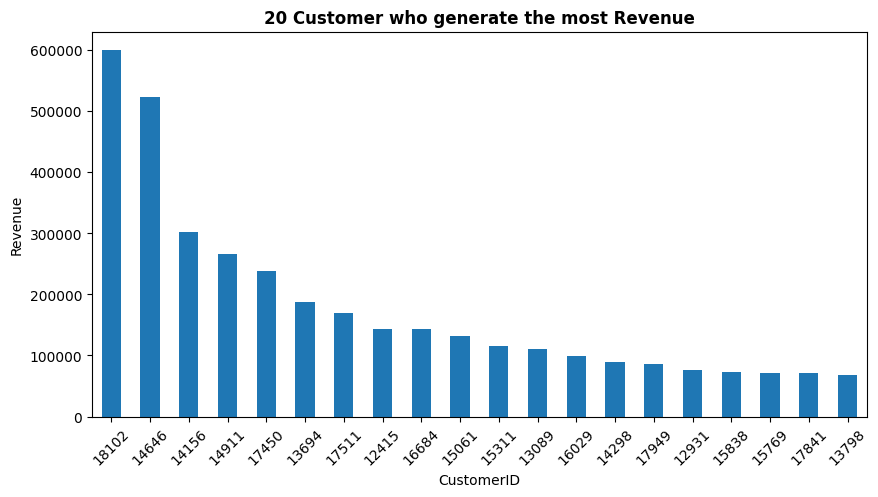

In [37]:
# 20 Customer who generate the most Revenue
df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10,5))
plt.xlabel('CustomerID')
plt.ylabel('Revenue')
plt.title('20 Customer who generate the most Revenue', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [38]:
#Top 5 countries with the most Quantity purchases
top_5_countries = df['Country'].value_counts().reset_index().rename(columns={'index':'Country', 'Country':'Customer_Count'}).head(5)
top_5_countries

,Country,Customer_Count
0,United Kingdom,713419
1,Germany,16428
2,EIRE,15540
3,France,13489
4,Netherlands,5033


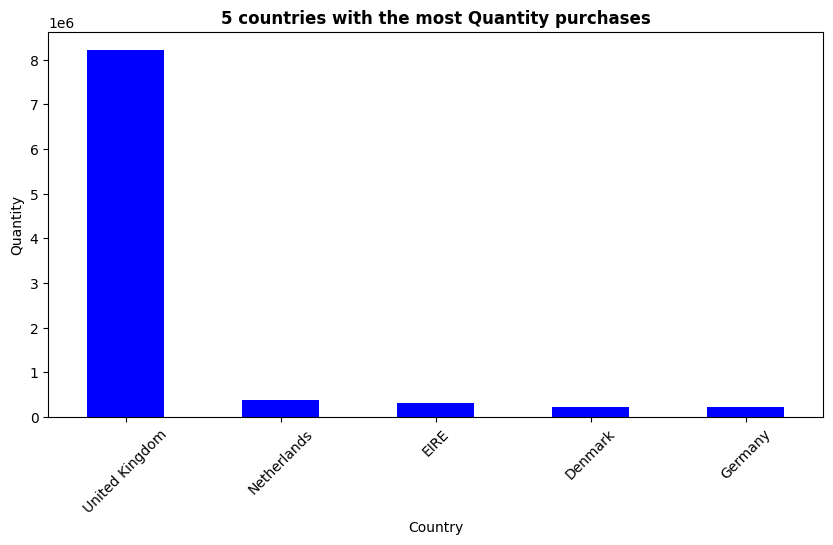

In [39]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5).plot(kind='bar', color='b', figsize=(10,5))
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('5 countries with the most Quantity purchases', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [40]:
#Bottome 5 countries with the Least Quantity purchases
bottom_5_countries = df['Country'].value_counts().reset_index().rename(columns={'index':'Country', 'Country':'Customer_Count'}).tail(5)
bottom_5_countries

,Country,Customer_Count
36,Lebanon,45
37,Korea,43
38,Nigeria,30
39,Czech Republic,25
40,Saudi Arabia,9


Text(0.5, 1.0, 'Top 5 Countries based on least number of customers ')

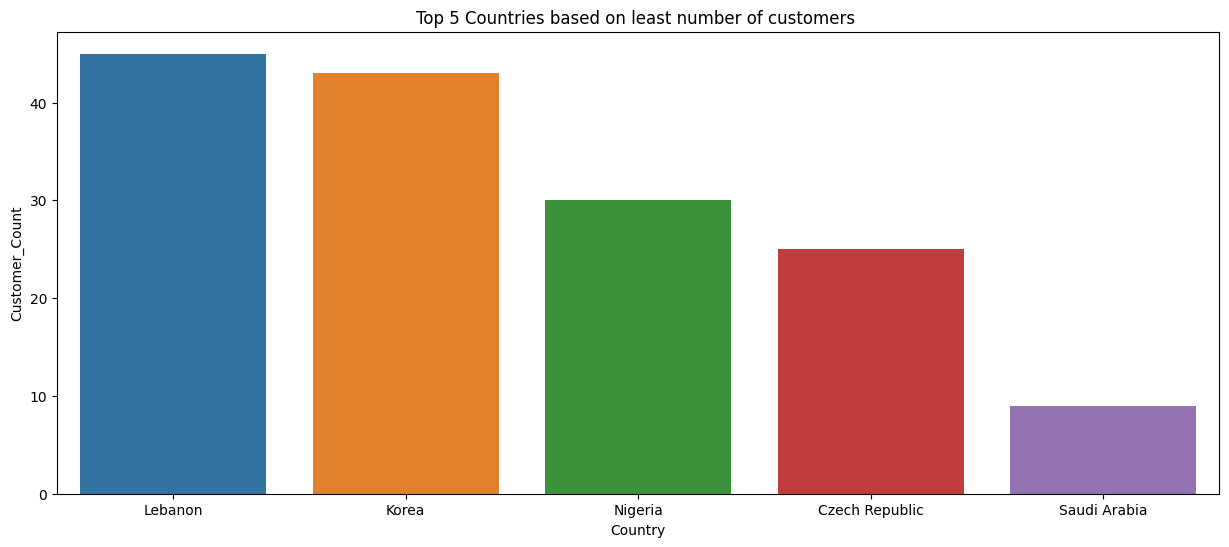

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(x=bottom_5_countries['Country'],y=bottom_5_countries['Customer_Count'])
plt.title('Top 5 Countries based on least number of customers ')

#PURCHASE FREQUENCY DISTRIBUTION BASED ON TIME

In [42]:
# Create a new column 'month' with month names
df['Month'] = df['InvoiceDate'].dt.strftime('%B')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,December
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,December
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,December
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,December
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,December
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,December
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,December


In [43]:
sales_in_months = df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month': 'Sale_counts'})
sales_in_months

,Month,Sale_counts
0,November,123424
1,October,97518
2,December,87159
3,September,73381
4,March,58378
5,June,57284
6,May,56037
7,July,52862
8,August,52545
9,April,48826


<Axes: title={'center': 'Sale in months'}, xlabel='Month', ylabel='Sale_counts'>

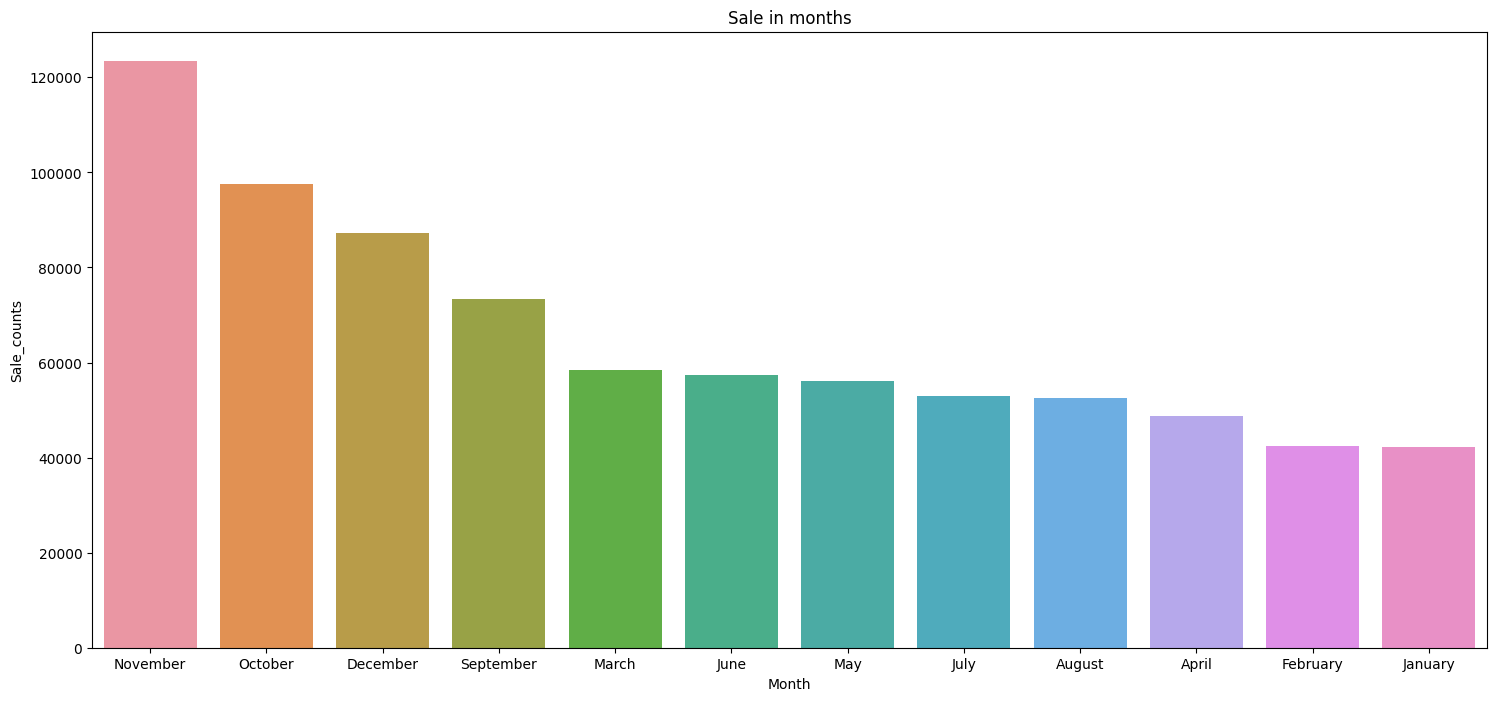

In [44]:
plt.figure(figsize=(18,8))
plt.title("Sale in months")
sns.barplot(x=sales_in_months['Month'], y=sales_in_months['Sale_counts'])

In [45]:
df['Hour'] = df['InvoiceDate'].dt.hour
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Revenue,Month,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,December,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,December,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,December,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,December,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,December,7
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,December,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,December,12


In [46]:
df['Hour'].unique()

array([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8, 20])

In [47]:
#Convert time from hours to time of day, for example morning, afternoon, evening
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [48]:
df['Day_time_type']=df['Hour'].apply(time)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Revenue,Month,Hour,Day_time_type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,December,7,Morning
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,December,7,Morning
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,December,7,Morning
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,December,7,Morning
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,December,7,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,December,12,Afternoon
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December,12,Afternoon
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,December,12,Afternoon
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,December,12,Afternoon


In [49]:
sales_in_hour = df['Day_time_type'].value_counts().reset_index().rename(columns={'index': 'Day_time_type', 'Day_time_type': 'Sales_count'})
sales_in_hour

,Day_time_type,Sales_count
0,Afternoon,547300
1,Morning,227279
2,Evening,17432


Text(0.5, 1.0, 'Sales counts in different day timings')

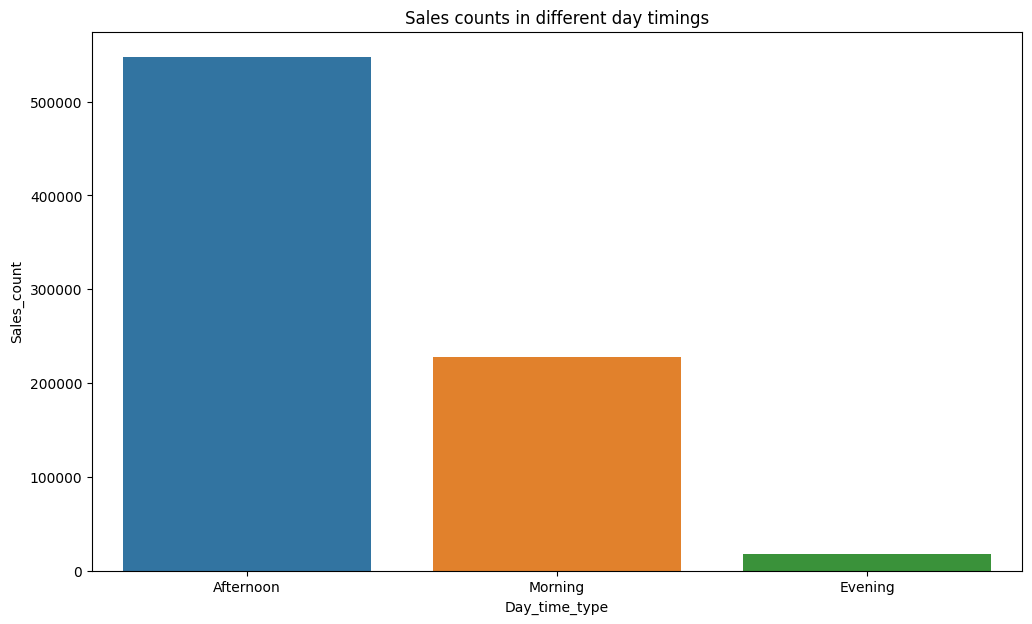

In [50]:
plt.figure(figsize=(12,7))
sns.barplot(x=sales_in_hour['Day_time_type'], y=sales_in_hour['Sales_count'])
plt.title("Sales counts in different day timings")

#4. Calculate RFM

In [51]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [52]:
# I assumed and specified the analysis time to calculate Recency
analysis_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [53]:
# create RFM DataFrame
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (analysis_date-InvoiceDate.max()).days,#recency
                              'Invoice': lambda Invoice: Invoice.nunique(),#frequency
                              'Revenue': lambda Revenue: Revenue.sum()#Monetary
                              })

In [54]:
# rename columns
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,529,4,236.86
12347,2,8,5633.32
12348,75,4,1652.40
12349,19,3,4228.69
12350,310,1,334.40


In [55]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,5766.0,200.708463,208.376572,1.0,26.00,95.000,379.7500,738.00
Frequency,5766.0,5.992542,11.950307,1.0,1.00,3.000,6.0000,364.00
Monetary,5766.0,2886.740402,14165.478023,0.0,348.63,891.985,2248.6125,600251.13


#5. Checking and Handling The Outliers

Text(0.5, 1.0, 'Monetary')

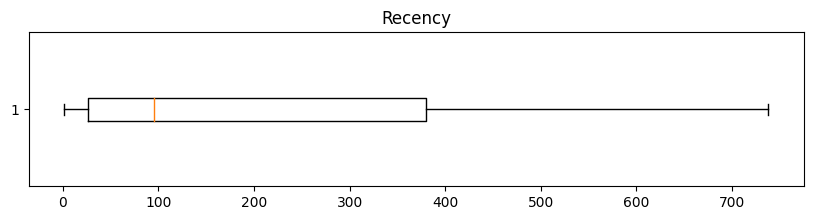

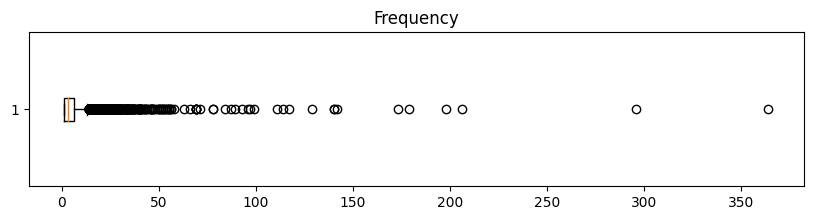

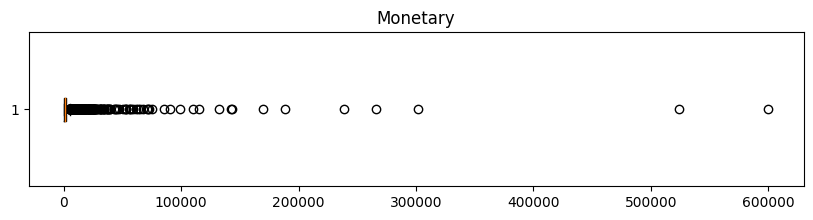

In [56]:
fig = plt.figure(1, figsize=(10, 2))
plt.boxplot(rfm_df['Recency'], vert=0)
plt.title('Recency')

fig = plt.figure(2, figsize=(10, 2))
plt.boxplot(rfm_df['Frequency'], vert=0)
plt.title('Frequency')

fig = plt.figure(3, figsize=(10, 2))
plt.boxplot(rfm_df['Monetary'], vert=0)
plt.title('Monetary')

In [57]:
Q1 = rfm_df['Recency'].quantile(0.25)
Q3 = rfm_df['Recency'].quantile(0.75)

IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df['Recency'] >= Q1 - 1.5*IQR) & (rfm_df['Recency'] <= Q3 + 1.5*IQR)]

In [58]:
Q1 = rfm_df['Frequency'].quantile(0.25)
Q3 = rfm_df['Frequency'].quantile(0.75)

IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df['Frequency'] >= Q1 - 1.5*IQR) & (rfm_df['Frequency'] <= Q3 + 1.5*IQR)]

In [59]:
Q1 = rfm_df['Monetary'].quantile(0.25)
Q3 = rfm_df['Monetary'].quantile(0.75)

IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df['Monetary'] >= Q1 - 1.5*IQR) & (rfm_df['Monetary'] <= Q3 + 1.5*IQR)]

Text(0.5, 1.0, 'Monetary')

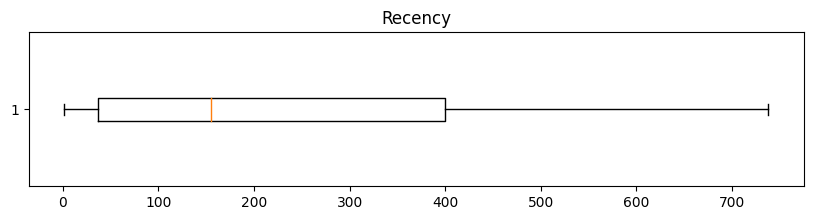

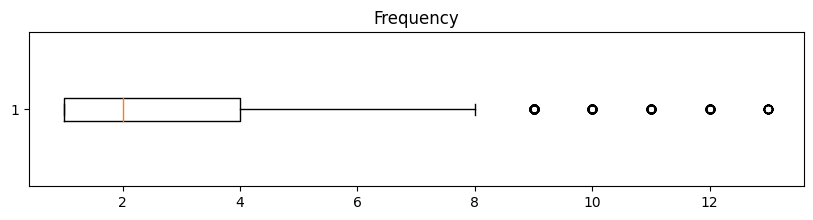

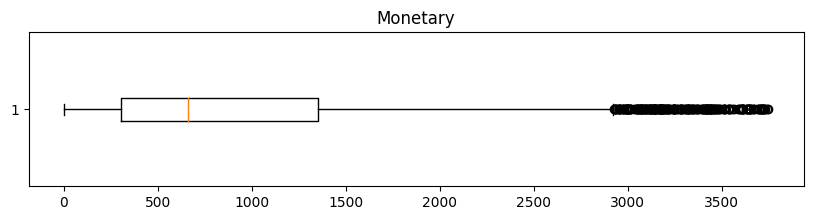

In [60]:
fig = plt.figure(1, figsize=(10, 2))
plt.boxplot(rfm_df['Recency'], vert=0)
plt.title('Recency')

fig = plt.figure(2, figsize=(10, 2))
plt.boxplot(rfm_df['Frequency'], vert=0)
plt.title('Frequency')

fig = plt.figure(3, figsize=(10, 2))
plt.boxplot(rfm_df['Monetary'], vert=0)
plt.title('Monetary')

<ipython-input-61-1201fac1a23b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df['Recency'], ax = ax[0])
<ipython-input-61-1201fac1a23b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df['Frequency'], ax = ax[1])
<ipython-input-61-1201fac1a23b>:4: UserWarning: 

`distplot` is a depr

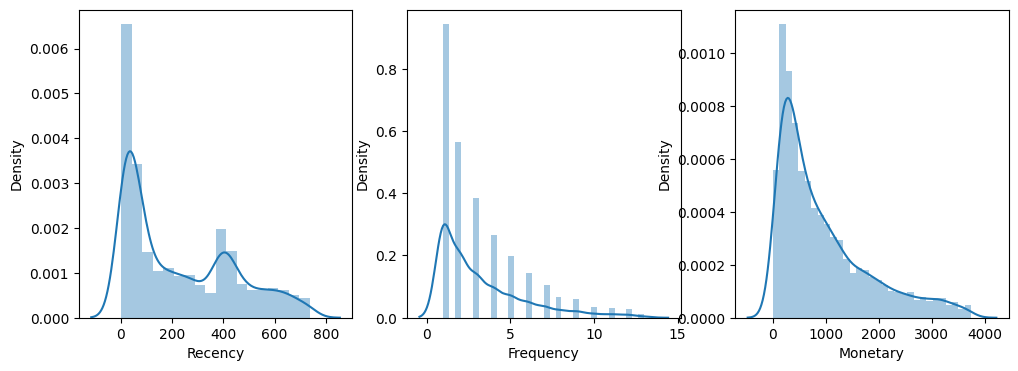

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(rfm_df['Recency'], ax = ax[0])
sns.distplot(rfm_df['Frequency'], ax = ax[1])
sns.distplot(rfm_df['Monetary'], ax = ax[2])
plt.show()

In [62]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm_df[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_df[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_df[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_df[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(rfm_df[x].skew().round(2))
    print(np.log(rfm_df[x]).skew().round(2))
    print(np.sqrt(rfm_df[x]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm_df[x])[0]).skew().round(2))

<ipython-input-62-586b6d2421be>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df[x], ax=ax[0,0])
<ipython-input-62-586b6d2421be>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm_df[x]), ax=ax[0,1])
<ipython-input-62-586b6d2421be>:6: UserWarning: 

`distplot` is a deprecated fun

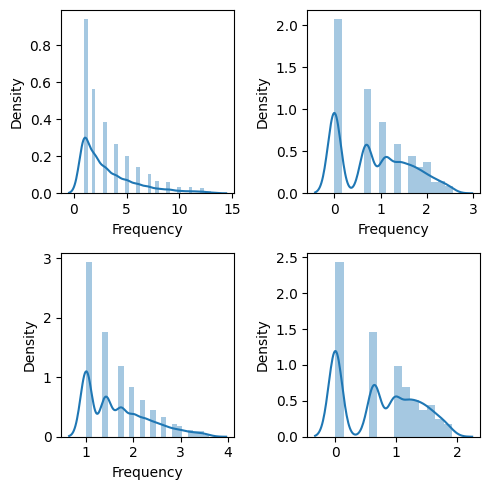

1.47
0.29
0.83
0.08


In [63]:
analyze_skewness('Frequency')

<ipython-input-62-586b6d2421be>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df[x], ax=ax[0,0])
<ipython-input-62-586b6d2421be>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(rfm_df[x]), ax=ax[0,1])
<ipython-input-62-586b6d2421be>:6: UserWarning: 

`distplot` is a deprecated fun

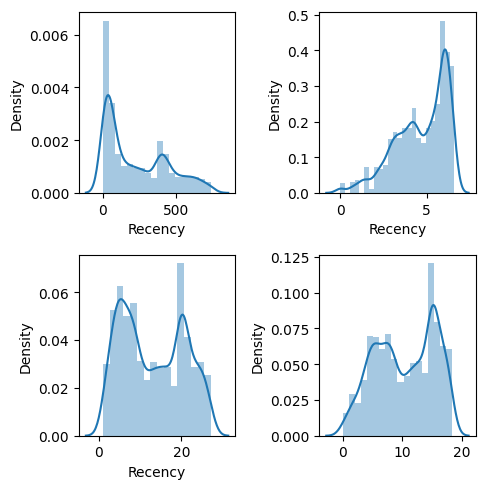

0.68
-0.77
0.16
-0.17


In [64]:
analyze_skewness('Recency')

In [65]:
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,529,4,236.86
12348,75,4,1652.40
12350,310,1,334.40
12351,375,1,300.93
12352,36,8,1889.21


In [66]:
rfm_df.count()

Recency      4821
Frequency    4821
Monetary     4821
dtype: int64

In [67]:
RFM_x = pd.DataFrame()
RFM_x['Recency'] = stats.boxcox(rfm_df['Recency'])[0]
RFM_x['Frequency'] = stats.boxcox(rfm_df['Frequency'])[0]
RFM_x['Monetary'] = pd.Series(np.cbrt(rfm_df['Monetary'])).values # root 3
RFM_x['CustomerID'] = rfm_df.index
RFM_x.head(10)

,Recency,Frequency,Monetary,CustomerID
0,16.469457,1.179314,6.187244,12346
1,8.190648,1.179314,11.822384,12348
2,13.754614,0.000000,6.941001,12350
3,14.676934,0.000000,6.701240,12351
4,6.049713,1.637202,12.362133,12352
5,11.886599,0.638576,7.409338,12353
6,12.438416,0.000000,10.257955,12354
7,12.089679,0.638576,9.822225,12355
8,13.394396,0.965746,7.380629,12361
9,9.488490,0.638576,8.203132,12363


In [68]:
RFM_x.rename(columns={0:'Recency',1:'Frequency',2:'Monetary'},inplace=True)

In [69]:
RFM_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     4821 non-null   float64
 1   Frequency   4821 non-null   float64
 2   Monetary    4821 non-null   float64
 3   CustomerID  4821 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 150.8 KB


<ipython-input-70-bb723524d025>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_x['Recency'], ax = ax[0])
<ipython-input-70-bb723524d025>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_x['Frequency'], ax = ax[1])
<ipython-input-70-bb723524d025>:4: UserWarning: 

`distplot` is a deprec

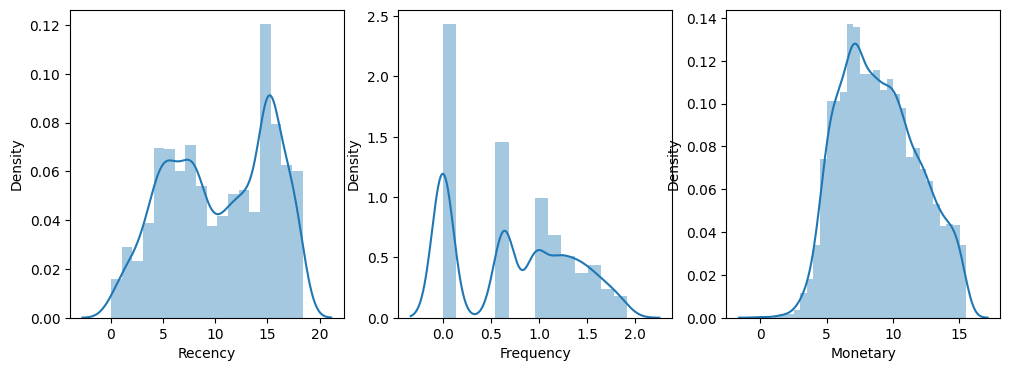

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(RFM_x['Recency'], ax = ax[0])
sns.distplot(RFM_x['Frequency'], ax = ax[1])
sns.distplot(RFM_x['Monetary'], ax = ax[2])
plt.show()

#6. Segmentation based on RFM Modeling and K-means

In [71]:
!pip install kneed

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator

In [73]:
clus_rfm = RFM_x.copy()

In [74]:
clus_rfm

,Recency,Frequency,Monetary,CustomerID
0,16.469457,1.179314,6.187244,12346
1,8.190648,1.179314,11.822384,12348
2,13.754614,0.000000,6.941001,12350
3,14.676934,0.000000,6.701240,12351
4,6.049713,1.637202,12.362133,12352
...,...,...,...,...
4816,11.390324,0.638576,5.859126,18281
4817,2.791480,0.638576,5.625753,18282
4818,15.393987,0.000000,7.728829,18284
4819,17.722274,0.000000,7.530248,18285


#6.1. Scaling The Data + Cluster Modeling

In [75]:
df_toscale = clus_rfm[["Recency", "Frequency", "Monetary"]]

In [76]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_toscale)
scaled_df = pd.DataFrame(scaled_features, columns=df_toscale.columns)

In [77]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4821 non-null   float64
 1   Frequency  4821 non-null   float64
 2   Monetary   4821 non-null   float64
dtypes: float64(3)
memory usage: 113.1 KB


In [78]:
scaled_df

,Recency,Frequency,Monetary
0,1.216393,0.733422,-0.948796
1,-0.453856,0.733422,0.976470
2,0.668674,-1.213299,-0.691272
3,0.854752,-1.213299,-0.773187
4,-0.885790,1.489271,1.160877
...,...,...,...
4816,0.191678,-0.159186,-1.060899
4817,-1.543138,-0.159186,-1.140631
4818,0.999417,-1.213299,-0.422108
4819,1.469149,-1.213299,-0.489954


In [79]:
clus_rfm[["Recency", "Frequency", "Monetary"]] = scaled_df[["Recency", "Frequency", "Monetary"]]
clus_rfm

,Recency,Frequency,Monetary,CustomerID
0,1.216393,0.733422,-0.948796,12346
1,-0.453856,0.733422,0.976470,12348
2,0.668674,-1.213299,-0.691272,12350
3,0.854752,-1.213299,-0.773187,12351
4,-0.885790,1.489271,1.160877,12352
...,...,...,...,...
4816,0.191678,-0.159186,-1.060899,18281
4817,-1.543138,-0.159186,-1.140631,18282
4818,0.999417,-1.213299,-0.422108,18284
4819,1.469149,-1.213299,-0.489954,18285


#6.2. K-means Clustering using Elbow Method

In [80]:
#inertia or distortion
inertia=[]
for k in range(1,10):
    kmeans= KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append( kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

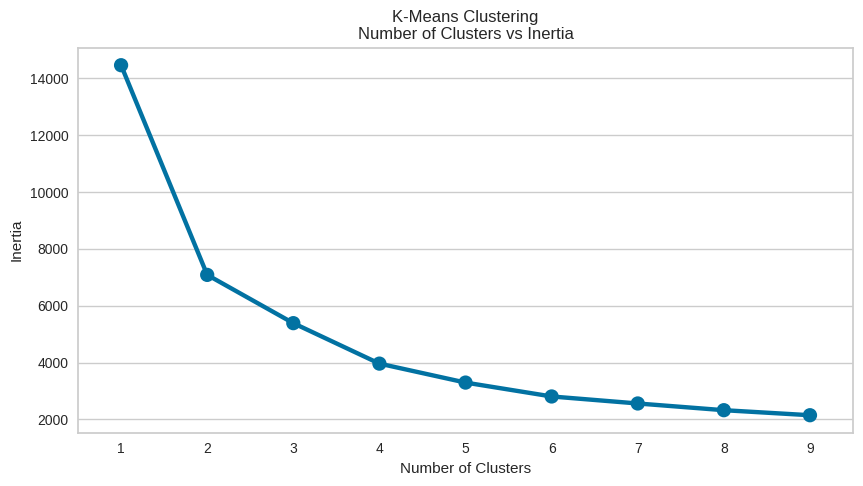

In [81]:
plt.figure(figsize=(10,5))
ax = sns.pointplot(x=list(range(1, 10)), y=inertia)
ax.set_title('K-Means Clustering\nNumber of Clusters vs Inertia')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [82]:
kl = KneeLocator(range(1,10), inertia, curve='convex', direction="decreasing") # setting KneeLocator
kl.elbow

3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

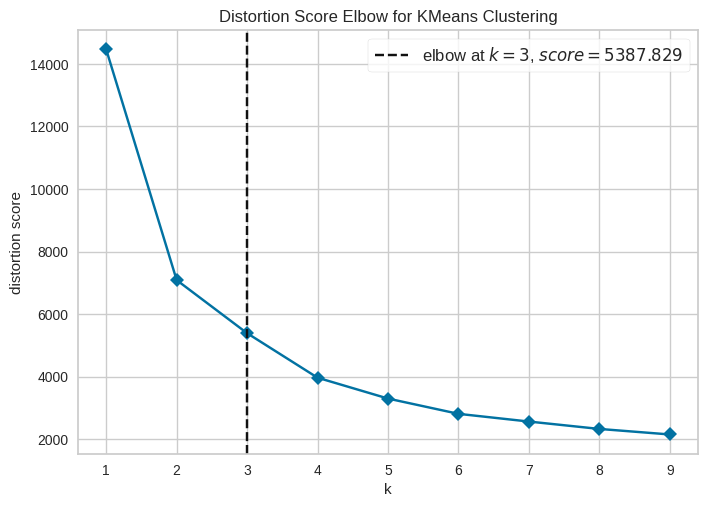

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(KMeans(n_clusters=k, max_iter=300, random_state=42), k=(1,10), timings= False)
visualizer.fit(scaled_features)
visualizer.show()

#Silhouette

In [84]:
from sklearn.metrics import silhouette_score

In [85]:
range_n_clusters =[2,3,4,5,6,7]
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
  kmeans.fit(scaled_features)
  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(scaled_features, cluster_labels)
  print("For n_clusters ={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

#Kết quả cho ra silhouette score có số điểm dương, càng cao thì độ tin cậy càng

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =2, the silhouette score is 0.4246286061520787


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =3, the silhouette score is 0.36439292541813395


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =4, the silhouette score is 0.3811808803792197


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =5, the silhouette score is 0.3662583788698052


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =6, the silhouette score is 0.36373454200614724


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =7, the silhouette score is 0.3436352863686874


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


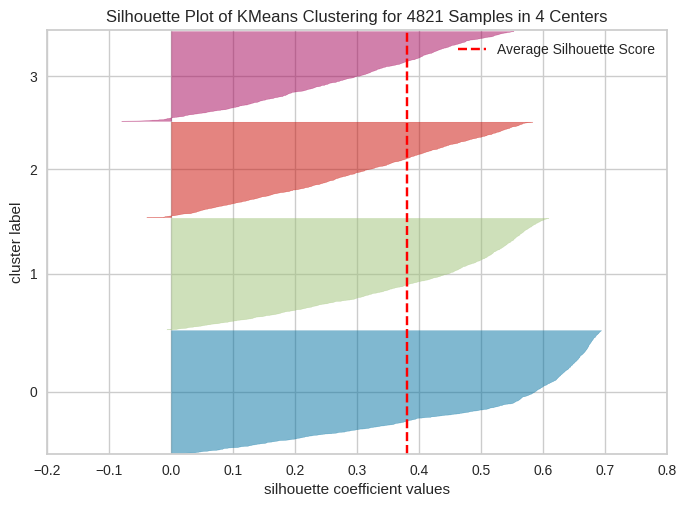

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4821 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [86]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(scaled_features)
visualizer.show()

In [87]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=42)
clus_label = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
clus_label

array([2, 0, 2, ..., 2, 2, 2], dtype=int32)

In [89]:
labels = pd.DataFrame(clus_label, index=clus_rfm.index, columns=['labels'])
labels.head()

,labels
0,2
1,0
2,2
3,2
4,0


In [90]:
clus_rfm = clus_rfm.join(labels)
clus_rfm

,Recency,Frequency,Monetary,CustomerID,labels
0,1.216393,0.733422,-0.948796,12346,2
1,-0.453856,0.733422,0.976470,12348,0
2,0.668674,-1.213299,-0.691272,12350,2
3,0.854752,-1.213299,-0.773187,12351,2
4,-0.885790,1.489271,1.160877,12352,0
...,...,...,...,...,...
4816,0.191678,-0.159186,-1.060899,18281,2
4817,-1.543138,-0.159186,-1.140631,18282,1
4818,0.999417,-1.213299,-0.422108,18284,2
4819,1.469149,-1.213299,-0.489954,18285,2


In [91]:
import plotly.express as px

fig = px.scatter_3d(clus_rfm, x='Recency', y='Frequency', z='Monetary', color='labels')

fig.update_layout(scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary'),
                                                                            width=1200,
                                                                            height=800)
fig.show()

<Axes: xlabel='labels', ylabel='Recency'>

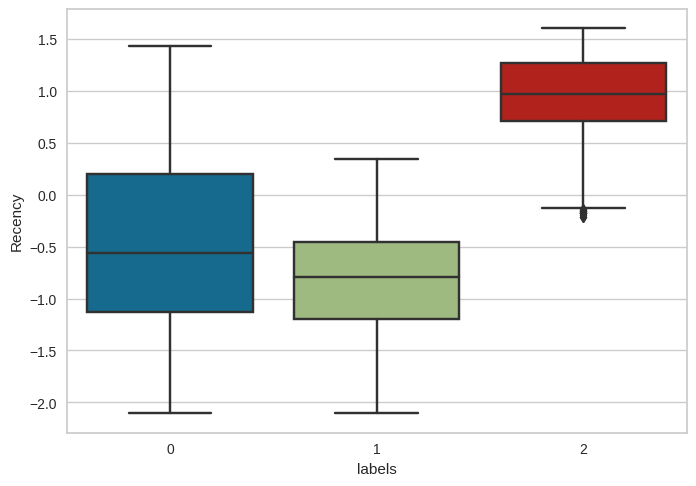

In [92]:
sns.boxplot(x=clus_rfm['labels'], y= clus_rfm['Recency'])

<Axes: xlabel='labels', ylabel='Frequency'>

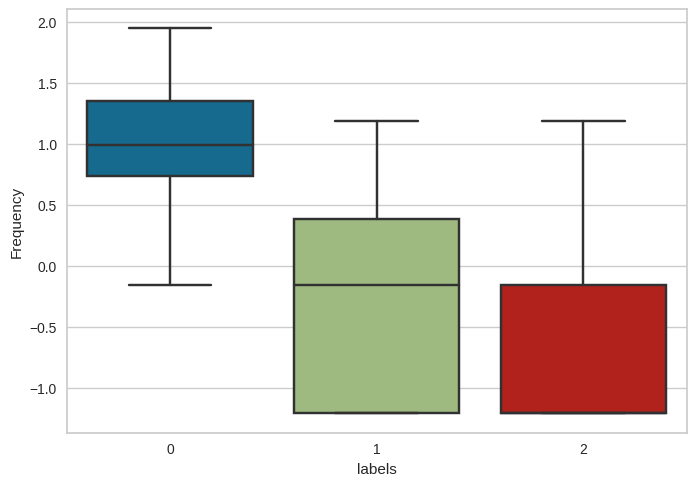

In [93]:
sns.boxplot(x=clus_rfm['labels'], y= clus_rfm['Frequency'])

<Axes: xlabel='labels', ylabel='Monetary'>

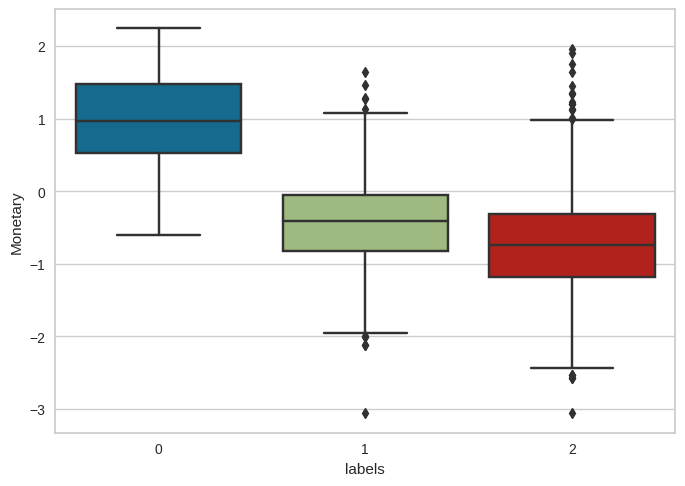

In [94]:
sns.boxplot(x=clus_rfm['labels'], y= clus_rfm['Monetary'])

In [95]:
clus_rfm[clus_rfm["labels"] == 1].head(50)

,Recency,Frequency,Monetary,CustomerID,labels
9,-0.192017,-0.159186,-0.260061,12363,1
13,-1.766959,-1.213299,-1.174137,12367,1
19,-1.425363,-0.159186,-0.430101,12375,1
25,-0.997518,-0.159186,-0.204849,12384,1
30,-0.411612,-1.213299,-0.263721,12390,1
33,-0.554591,-0.159186,0.639593,12394,1
36,-0.750966,-1.213299,0.962784,12398,1
41,-0.703027,-0.159186,0.375753,12403,1
43,0.035606,-1.213299,1.023178,12405,1
52,-0.554591,-1.213299,-0.180448,12420,1
